In [2]:
from pydoc import describe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [3]:
#Lecture des données
data = pd.read_excel("/home/congo/Bureau/2022-m1-staps/data_motives/data_motives_final.xlsx","haller",) 

In [4]:
# mise a zero des valeurs manquantes
data = data.fillna(0)

#stoker le nom des colonnes
column_name = [c for c in data]

In [5]:
data = data.to_numpy()
data = data[:,39:]
nlin ,ncol =data.shape
print('data' ,data.shape)

data (1075, 71)


##                            Preprosseccing

In [6]:
# rendre toute les valeurs positives
data_correct = data
data = np.absolute(data)

In [7]:
#Supression des valeurs abérantes par rapport au seuil
seuil = 5*np.std(data,axis=0,dtype = np.float64)
#print(seuil)
data = np.array(data)
data_tmp = np.zeros_like(data)
data_tmp[data < seuil] = data[data < seuil]
data = data_tmp
#print(data)

In [8]:
#normalisation par ligne (avec ecartype nul) our avoir des valeurs entre 0 et 1

#indices à suprimer
max = np.max(data,axis = 1)
indices = [i for i, e in enumerate(max) if e == 0]
#print(indices)

#suppression des lignes
data_del = np.delete(data,indices,axis = 0)
data = data_del

#normalisation par ligne sans ecartype nul pour avoir des valeurs entre 0 et 1
min = np.min(data,axis = 1)
max = np.max(data,axis = 1)
data = (data-min[:,np.newaxis])/max[:,np.newaxis]

#print(data)


In [9]:
# retour des valeurs négatives

#suppression des lignes
data_del = np.delete(data_correct,indices,axis = 0)
data_correct = data_del

#print("data before = ", data[data < 0])

#indices des valeurs négatives
indices_val_neg_i = np.where(data_correct < 0)
#print("indices_val_neg_i = ",indices_val_neg_i)

data[indices_val_neg_i] = -1*data[indices_val_neg_i]


#print("data after = ", data[data < 0] )
nlin ,ncol =data.shape


 Cluster Algorithm 

## 1) CAH algorithm 

In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd 


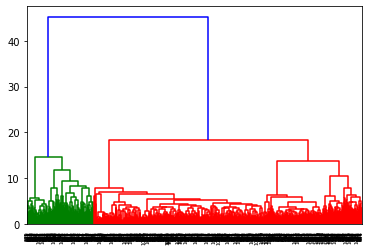

In [11]:
#create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))

In [12]:
hc = AgglomerativeClustering(n_clusters=3,affinity= 'euclidean',linkage='ward' )


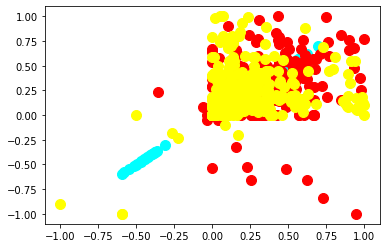

In [13]:
y_hc = hc.fit_predict(data)
plt.scatter(data[y_hc == 0,28],data[ y_hc == 0,28],s= 100,c = 'cyan')
plt.scatter(data[y_hc == 1,0],data[ y_hc == 1,1],s= 100,c = 'red')
plt.scatter(data[y_hc == 2,0],data[ y_hc == 2,1],s= 100,c = 'yellow')
plt.scatter(data[y_hc == 3,0],data[ y_hc == 3,1],s= 100,c = 'black')
plt.scatter(data[y_hc == 4,0],data[ y_hc == 4,1],s= 100,c = 'green')
plt.scatter(data[y_hc == 5,0],data[ y_hc == 5,1],s= 100,c = 'green')


## K-means

In [14]:
from sklearn.cluster import KMeans


Text(0, 0.5, ' Cout du modele inertia')

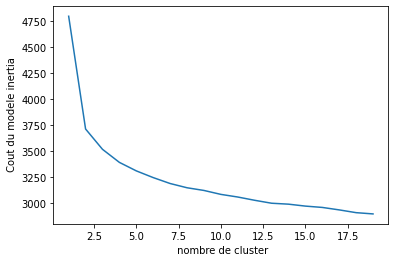

In [15]:
#nombre de cluster optimal 
# inertia calcule le cout (somme des distance entre les points d'un cluster et du centroide )
# methode shadow aur=tre indicateur
inertia =[]
K_range =range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(data)
    inertia.append(model.inertia_)


plt.plot(K_range,inertia)
plt.xlabel(" nombre de cluster")
plt.ylabel(" Cout du modele inertia")


# 2-6 clusters ? la zone de "coude"

Text(0.5, 0, " nombre d'étudiant")

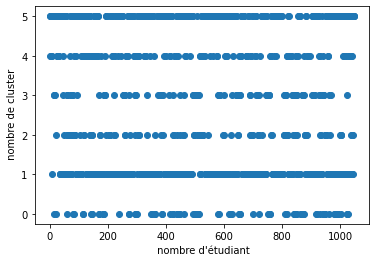

In [16]:
x_etudiant=range(0,nlin)

n_cluster = 6
model = KMeans(n_clusters= n_cluster)
y_pred = model.fit_predict(data)

plt.scatter(x_etudiant,y_pred)
plt.ylabel(" nombre de cluster")
plt.xlabel(" nombre d'étudiant")

                            Statistique Inférentielle sur chaque cluster 

In [17]:
import scipy.stats as stats

In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [19]:

#exemple !!!

In [20]:
from sklearn.feature_selection import f_classif
import numpy as np
X = np.array([5000, 18000, 47500, 45600, 49500]).reshape(-1,1)
y = np.array([1,1,0,0,0])
F,pval = f_classif(X,y)
print(F,pval)

[50.74816155] [0.00569324]


In [21]:

# mettre data en df
df_cluster = pd.DataFrame(data)
# renommer les colonne
df_cluster.columns = column_name[39:]
#print(df_cluster.shape)

# création d'une colonne cluster 
df_cluster['cluster'] = y_pred
#print(df_cluster.shape)


In [22]:
#stata.info()

In [23]:
#df_cluster.info()

In [24]:
# probleme de type alors on le change
df_cluster = df_cluster.astype(float,errors='raise')
# df_cluster.info()

renommer les lignes ( remplacer 0 par etudiant0)

In [25]:
line_name = ['etudiant' + str(i) for i in range(nlin)]
# print(line_name)
df_cluster.index = line_name
# print(df_cluster)

separation des clusters et centres des cluster 


In [60]:
df_cluster_0 = df_cluster.loc[df_cluster.loc[:,'cluster'] == 0]
df_cluster_1 = df_cluster.loc[df_cluster.loc[:,'cluster'] == 1]
df_cluster_2 = df_cluster.loc[df_cluster.loc[:,'cluster'] == 2]
df_cluster_3 = df_cluster.loc[df_cluster.loc[:,'cluster'] == 3]
df_cluster_4 = df_cluster.loc[df_cluster.loc[:,'cluster'] == 4]
df_cluster_5 = df_cluster.loc[df_cluster.loc[:,'cluster'] == 5]


center_cluster_0 = model.cluster_centers_[0,:]  
center_cluster_1 = model.cluster_centers_[1,:]
center_cluster_2 = model.cluster_centers_[2,:]
center_cluster_3 = model.cluster_centers_[3,:]
center_cluster_4 = model.cluster_centers_[4,:]
center_cluster_5 = model.cluster_centers_[5,:]


In [ ]:
#question : nb facteur de variabilité = nb de cluster ?

In [66]:
mu = np.mean(df_cluster)    # overall mean
mu_cluster_0 = np.mean(df_cluster_0)    #   mean of cluster_0
mu_cluster_1 = np.mean(df_cluster_1)    #   mean of cluster_1
mu_cluster_2 = np.mean(df_cluster_2)    #   mean of cluster_2
mu_cluster_3 = np.mean(df_cluster_3)    #   mean of cluster_3
mu_cluster_4 = np.mean(df_cluster_4)    #   mean of cluster_4
mu_cluster_5 = np.mean(df_cluster_5)    #   mean of cluster_5

# nb élément dans les cluster 
n_cluster_0 = df_cluster_0.shape[0]
n_cluster_1 = df_cluster_1.shape[0]
n_cluster_2 = df_cluster_2.shape[0]
n_cluster_3 = df_cluster_3.shape[0]
n_cluster_4 = df_cluster_4.shape[0]
n_cluster_5 = df_cluster_5.shape[0]


SSm = np.sum(((df_cluster-mu)**2))        # SS(mean) ou SCE(somme des carrés des écarts)

# SSf = np.sum((X1-mu1)**2) + np.sum((X2-mu2)**2)   # SS(fit)


(93, 72) 93


/home/congo/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Fval et pval

In [62]:
F,pval = f_classif(df_cluster,y_pred)
#trier par ordre décroissant de la pval
# print(pval)
# indices_pval = np.argsort(pval)
# print(pval[indices_pval])


In [86]:

chaine = "Energie ~ Confiance_en_soi + Energie"
model = ols(chaine, data=df_cluster).fit()
aov_table = sm.stats.anova_lm(model, typ=3)
print(aov_table)

                        sum_sq      df             F        PR(>F)
Intercept         8.150097e-31     1.0  4.953786e+01  3.513773e-12
Confiance_en_soi  5.019950e-30     1.0  3.051223e+02  3.706428e-60
Energie           2.463218e+01     1.0  1.497192e+33  0.000000e+00
Residual          1.722551e-29  1047.0           NaN           NaN


In [26]:
# 'Confiance en soi' par 'Confiance_en_soi'
# print(column_name[90])
column_name[90] = 'Confiance_en_soi'
# print(column_name[90])
df_cluster = df_cluster.rename(columns={'Confiance en soi':'Confiance_en_soi'}) 

# print(df_cluster['Confiance_en_soi'])

In [39]:
# List_qualif = column_name[39:]
# for qualif in List_qualif : #pour chaque qualité 
#     chaine =  qualif + " ~ C(cluster)"
#     model = ols(chaine, data=df_cluster).fit()
#     aov_table = sm.stats.anova_lm(model, typ=3)
#     print(aov_table)

In [ ]:
#cluster 0
indices_cluster_0 = np.where(data[y_pred == 0])
cluster_0 = data[y_pred == 0]

# retour du df
df_0 = pd.DataFrame(cluster_0)
# prendre la valeur absolute pour éviter la compensation
df_0 = np.absolute(df_0)
df_0.columns = column_name[39:]
#print(df_0)

#statistique inférentielle sur chaque cluster 

# faire pour chaque cluster une statistique inférentielle 

# les mots qui caractérise les clusters

# trier par somme de toutes les colonnes
sum_colonne_0 = df_0.sum()
print(sum_colonne_0.sort_values(ascending=False))


Galbant         77.597964
Stretchcing     56.566502
Confort         51.230303
Plaisir         49.113195
Repetition      48.192301
                  ...    
Puissance        28.02486
Facilite        27.835805
Endurance       27.308292
Acceleration    26.996998
Rapide          23.132263
Length: 71, dtype: object


In [ ]:
#cluster 1
indices_cluster_1 = np.where(data[y_pred == 1])
cluster_1 = data[y_pred == 1]

# retour du df
df_1 = pd.DataFrame(cluster_1)
# prendre la valeur absolute pour éviter la compensation
df_1 = np.absolute(df_1)
df_1.columns = column_name[39:]
#print(df_1)

# trier par somme de toutes les colonnes
sum_colonne_1 = df_1.sum()
print(sum_colonne_1.sort_values(ascending=False))

Galbant           119.751873
Repetition        103.062749
Ralentissement     95.217556
Stretchcing        95.185472
Decouragement      90.629534
                     ...    
Muscultation       45.438831
Meilleur           44.530772
Cardio             44.392387
Rapide             38.159449
Energie            37.791284
Length: 71, dtype: object


In [ ]:
#cluster 2
indices_cluster_2 = np.where(data[y_pred == 2])
cluster_2 = data[y_pred == 2]

# retour du df
df_2 = pd.DataFrame(cluster_2)
# prendre la valeur absolute pour éviter la compensation
df_2 = np.absolute(df_2)
df_2.columns = column_name[39:]
#print(df_2)

# trier par somme de toutes les colonnes
sum_colonne_2 = df_2.sum()
print(sum_colonne_2.sort_values(ascending=False))

Performance     56.54923
Plaisir        47.258072
Efficacite     47.111768
Depassement    46.713913
Cardio         46.489021
                 ...    
Beaute          3.015553
Douceur         2.721342
Securite        2.592479
Confort         1.676983
Ennuyeux             0.0
Length: 71, dtype: object


In [ ]:
#cluster 3
indices_cluster_3 = np.where(data[y_pred == 3])
cluster_3 = data[y_pred == 3]

# retour du df
df_3 = pd.DataFrame(cluster_3)
# prendre la valeur absolute pour éviter la compensation
df_3 = np.absolute(df_3)
df_3.columns = column_name[39:]
#print(df_3)

# trier par somme de toutes les colonnes
sum_colonne_3 = df_3.sum()
print(sum_colonne_3.sort_values(ascending=False))

Performance    88.980946
Partage        83.156963
Meilleur       82.966066
Plaisir        82.666313
Groupe         79.412279
                 ...    
Force           6.992334
Qualite         6.276778
Ennuyeux        4.405572
Securite        3.421003
Confort         2.814457
Length: 71, dtype: object


In [ ]:
#cluster 4
indices_cluster_4 = np.where(data[y_pred == 4])
cluster_4 = data[y_pred == 4]

# retour du df
df_4 = pd.DataFrame(cluster_4)
# prendre la valeur absolute pour éviter la compensation
df_4 = np.absolute(df_4)
df_4.columns = column_name[39:]
#print(df_4)

# trier par somme de toutes les colonnes
sum_colonne_4 = df_4.sum()
print(sum_colonne_4.sort_values(ascending=False))

detente      53.650181
Plaisir      49.751437
Partage      46.450876
Serenite     44.842832
Calme        44.226381
               ...    
Beaute        2.637775
Securite      2.520003
Confort       2.130858
Inconfort     2.113536
Ennuyeux      0.150181
Length: 71, dtype: object


In [ ]:
#cluster 5
indices_cluster_5 = np.where(data[y_pred == 5])
cluster_5 = data[y_pred == 5]

# retour du df
df_5 = pd.DataFrame(cluster_5)
# prendre la valeur absolute pour éviter la compensation
df_5 = np.absolute(df_5)
df_5.columns = column_name[39:]
#print(df_5)

# trier par somme de toutes les colonnes
sum_colonne_5 = df_5.sum()
print(sum_colonne_5.sort_values(ascending=False))

Objectif        52.122468
Perseverance    51.774973
Confort         50.687706
Plaisir         50.038861
Repetition      49.221591
                  ...    
Lent            25.405633
Sexy            21.990975
Lassitude       21.523985
Culpabilite     21.160573
Ennuyeux        20.867014
Length: 71, dtype: object


##                            fuzzy cluster

In [ ]:
from fcmeans import FCM


In [ ]:
n_cluster = 4
fcm = FCM(n_clusters= n_cluster)
# faire ça pour eviter les problemes de shape !!!
data = np.array(data, dtype=np.float64)
fcm.fit(data)

##expliquations :
# data = np.array(data)
#print(data.dtype)
#print(data.shape)
#arr = np.ones([1050,71])
#print(arr.shape)
#fcm.fit(data)

Text(0.5, 0, " nombre d'étudiant")

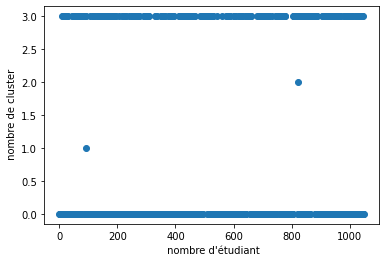

In [ ]:
# outputs 
y_pred_centers = fcm.centers
y_pred = fcm.predict(data)


plt.scatter(x_etudiant,y_pred)
plt.ylabel(" nombre de cluster")
plt.xlabel(" nombre d'étudiant")

uniquement le centre des clusters !!!

In [ ]:
#cluster 0
print(y_pred_centers.shape)
cluster_0 = y_pred_centers[0,:]
print(cluster_0)
# retour du df
df_0 = pd.DataFrame(cluster_0)
# prendre la valeur absolute pour éviter la compensation
df_0 = np.absolute(df_0)
# ajouter les noms des colonnes
df_0.columns = column_name[39:]


#print(df_0)

# trier les valeurs

print(df_0)


(4, 71)
[0.17146673 0.15996633 0.14508351 0.1418201  0.15838276 0.1265604
 0.12999283 0.12799452 0.12603176 0.18454017 0.1618625  0.12946863
 0.1764391  0.14828819 0.16009047 0.16519649 0.15341658 0.16575386
 0.18136483 0.16248493 0.17251205 0.13458682 0.21878883 0.19150754
 0.15140002 0.16220129 0.19201341 0.1732566  0.16489977 0.20818946
 0.17302555 0.15255531 0.23883292 0.23081507 0.11059567 0.15629002
 0.21315589 0.21278937 0.21061676 0.22730004 0.15696018 0.1453119
 0.18755233 0.11111754 0.24039486 0.22340762 0.11555888 0.25846128
 0.26685724 0.21136576 0.10907658 0.26485507 0.25662859 0.15810709
 0.28772398 0.23951287 0.20052962 0.24346573 0.21859447 0.2581123
 0.2044959  0.2343847  0.15720523 0.32196902 0.28161739 0.25740716
 0.18295376 0.28080638 0.23474059 0.20938507 0.25493839]


ValueError: Length mismatch: Expected axis has 1 elements, new values have 71 elements

In [ ]:
#cluster 0
indices_cluster_0 = np.where(data[y_pred == 0])
cluster_0 = data[y_pred == 0]

# retour du df
df_0 = pd.DataFrame(cluster_0)
# prendre la valeur absolute pour éviter la compensation
df_0 = np.absolute(df_0)
df_0.columns = column_name[39:]
#print(df_0)

# trier par somme de toutes les colonnes
sum_colonne_0 = df_0.sum()
print(sum_colonne_0)

Confort            47.892948
Securite           47.855751
Qualite            55.951500
Force              52.341393
Maintien           61.158876
                     ...    
Role              163.989608
Performance       229.857031
Meilleur          195.859254
Individualiste    139.705215
detente           183.039019
Length: 71, dtype: float64


In [ ]:
#cluster 1
indices_cluster_1 = np.where(data[y_pred == 1])
cluster_1 = data[y_pred == 1]

# retour du df
df_1 = pd.DataFrame(cluster_1)
# prendre la valeur absolute pour éviter la compensation
df_1 = np.absolute(df_1)
df_1.columns = column_name[39:]
#print(df_1)

# trier par somme de toutes les colonnes
sum_colonne_1 = df_1.sum()
print(sum_colonne_1)

In [ ]:
#cluster 2
indices_cluster_2 = np.where(data[y_pred == 2])
cluster_2 = data[y_pred == 2]

# retour du df
df_2 = pd.DataFrame(cluster_2)
# prendre la valeur absolute pour éviter la compensation
df_2 = np.absolute(df_2)
df_2.columns = column_name[39:]
#print(df_2)

# trier par somme de toutes les colonnes
sum_colonne_2 = df_2.sum()
print(sum_colonne_2)

In [ ]:
#cluster 3
indices_cluster_3 = np.where(data[y_pred == 3])
cluster_3 = data[y_pred == 3]

# retour du df
df_3 = pd.DataFrame(cluster_3)
# prendre la valeur absolute pour éviter la compensation
df_3 = np.absolute(df_3)
df_3.columns = column_name[39:]
#print(df_3)

# trier par somme de toutes les colonnes
sum_colonne_3 = df_3.sum()
print(sum_colonne_3)

In [ ]:
#cluster 4
indices_cluster_4 = np.where(data[y_pred == 4])
cluster_4 = data[y_pred == 4]

# retour du df
df_4 = pd.DataFrame(cluster_4)
# prendre la valeur absolute pour éviter la compensation
df_4 = np.absolute(df_4)
df_4.columns = column_name[39:]
#print(df_4)

# trier par somme de toutes les colonnes
sum_colonne_4 = df_4.sum()
print(sum_colonne_4)

In [ ]:
#cluster 5
indices_cluster_5 = np.where(data[y_pred == 5])
cluster_5 = data[y_pred == 5]

# retour du df
df_5 = pd.DataFrame(cluster_5)
# prendre la valeur absolute pour éviter la compensation
df_5 = np.absolute(df_5)
df_5.columns = column_name[39:]
#print(df_5)

# trier par somme de toutes les colonnes
sum_colonne_5 = df_5.sum()
print(sum_colonne_5)

## data_train,data_test,data_validation

In [ ]:
data_train = data[:int(nlin*0.70),:int(ncol*0.70)]
data_test = data[int(nlin*0.70):,int(ncol*0.70):]

In [ ]:

#pour construire un pre-processsing

class MyStandardScaler:
       
    def fit(self,X_train):
        self.mean_=np.mean(X_train,axis=0)
        self.std_=np.std(X_train,axis=0)
                
    def transform(self,X):
        """
        Cette méthode peut notamment s'appliquer aux données test. 
        Mais dans ce cas là, c'est le la moyenne et l'écart type des données train qui doit être utiliser. 
        """
        assert len(X.shape)==2, "X must be a matrix"
        
        "res[i,j]=(X[i,j] - mean[j])/std[j]"
        res=(X-self.mean_[np.newaxis,:])/self.std_[np.newaxis,:]
        return res

    
    def fit_transform(self,X_train):
        self.fit(X_train)
        return self.transform(X_train)